# Créations d'entreprises et d'établissements au cours de l'année 2019

https://www.insee.fr/fr/statistiques/4309471?sommaire=4309476

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
entreprises = pd.read_csv('crent_2019.csv',sep=';')

C:\Users\Muchan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [29]:
entreprises

,REG,DEP,ZE,AU,UU,COM,APE,A64,A38,A21,A10,TAILLE,CJ1,CJ2,ARTISAN,FREQ
0,1,971,101,997,9A102,97111,1011Z,CA0,CA,C,BE,1,M,57,A,1
1,1,971,101,997,9A102,97111,1085Z,CA0,CA,C,BE,0,P,10,A,1
2,1,971,101,997,9A102,97111,4120A,FZ0,FZ,F,FZ,1,M,57,A,1
3,1,971,101,997,9A102,97111,4312A,FZ0,FZ,F,FZ,0,M,54,A,1
4,1,971,101,997,9A102,97111,4312A,FZ0,FZ,F,FZ,0,P,10,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409127,94,2B,9407,710,2B102,2B123,8690E,QA0,QA,Q,OQ,0,P,10,N,1
409128,94,2B,9407,710,2B102,2B123,9529Z,SZ2,SZ,S,RU,0,P,10,A,1
409129,94,2B,9407,710,2B102,2B123,9602B,SZ3,SZ,S,RU,0,P,10,A,2
409130,94,2B,9407,710,2B102,2B123,9609Z,SZ3,SZ,S,RU,0,P,10,N,2


In [30]:
entreprises.head()

,REG,DEP,ZE,AU,UU,COM,APE,A64,A38,A21,A10,TAILLE,CJ1,CJ2,ARTISAN,FREQ
0,1,971,101,997,9A102,97111,1011Z,CA0,CA,C,BE,1,M,57,A,1
1,1,971,101,997,9A102,97111,1085Z,CA0,CA,C,BE,0,P,10,A,1
2,1,971,101,997,9A102,97111,4120A,FZ0,FZ,F,FZ,1,M,57,A,1
3,1,971,101,997,9A102,97111,4312A,FZ0,FZ,F,FZ,0,M,54,A,1
4,1,971,101,997,9A102,97111,4312A,FZ0,FZ,F,FZ,0,P,10,A,1


In [31]:
entreprises.tail()

,REG,DEP,ZE,AU,UU,COM,APE,A64,A38,A21,A10,TAILLE,CJ1,CJ2,ARTISAN,FREQ
409127,94,2B,9407,710,2B102,2B123,8690E,QA0,QA,Q,OQ,0,P,10,N,1
409128,94,2B,9407,710,2B102,2B123,9529Z,SZ2,SZ,S,RU,0,P,10,A,1
409129,94,2B,9407,710,2B102,2B123,9602B,SZ3,SZ,S,RU,0,P,10,A,2
409130,94,2B,9407,710,2B102,2B123,9609Z,SZ3,SZ,S,RU,0,P,10,N,2
409131,94,2B,9407,998,2B000,2B149,7721Z,NZ1,NZ,N,MN,0,P,10,N,1


In [32]:
nb_lignes, nb_col = entreprises.shape
print(nb_lignes)
print(nb_col)

409132
16


# Questions: 

Dans quels/quelles département/région il y a plus de création d'entreprise ?

Quels types d'entreprise sont les plus fréquente ? (activité principale de l'entreprise)

Parmis les entreprises créees, où se situent les plus grandes (taille d'effectif salarié) ?



In [33]:
entreprises.groupby(entreprises.REG).FREQ.sum().sort_values()

REG
6       1020
3       1836
2       3825
94      5036
1       5326
4       6964
24     20851
27     22557
28     26743
53     27367
52     33058
44     44080
32     48793
75     67155
76     75565
93     80658
84    100276
11    244147
Name: FREQ, dtype: int64

11 - Île-de-France

84 - Auvergne-Rhône-Alpes

93 - Provence-Alpes-Côte d'Azur

In [34]:
entreprises.groupby(entreprises.APE).FREQ.sum().sort_values()[-10:]

APE
8559B    14553
4619B    15396
6201Z    15465
9329Z    15876
6831Z    17733
8121Z    18383
5610C    18726
9609Z    27199
5320Z    60240
7022Z    62321
Name: FREQ, dtype: int64

In [35]:
entreprises.groupby(entreprises.TAILLE).FREQ.sum().sort_values()

TAILLE
22         2
21         7
12       113
3        744
11      1970
2       2825
1      16268
0     793328
Name: FREQ, dtype: int64

In [36]:
entreprises.groupby(['TAILLE','REG']).FREQ.sum().sort_values()[10:]

TAILLE  REG
12      75          2
        1           3
11      3           3
12      32          3
        53          4
                ...  
0       75      65468
        76      73794
        93      78939
        84      97680
        11     238131
Name: FREQ, Length: 99, dtype: int64

(array([10371., 74863., 49467., 30114., 28535., 37321.,     0., 41120.,
        98122., 39219.]),
 array([ 1. , 10.3, 19.6, 28.9, 38.2, 47.5, 56.8, 66.1, 75.4, 84.7, 94. ]),
 <a list of 10 Patch objects>)

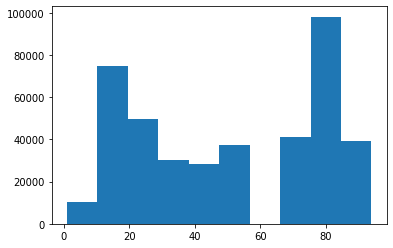

In [46]:
plt.hist(entreprises.REG)

In [47]:
entreprises.REG

0          1
1          1
2          1
3          1
4          1
          ..
409127    94
409128    94
409129    94
409130    94
409131    94
Name: REG, Length: 409132, dtype: int64